# Project Work
This project is composed from two dataset:
- Lipidoma
- Metaboloma

The aim of this project is identify bio-markers that allow to distinguish the evolution of pathology (HCV). We have 3 several class of patient:
- hepatic carcinoma
- positive HCV
- chronic HCV


## Lipidoma

### Read data set 
On the raw we have the features, while on the column we have the samples.

However, I set the features on the column and the samples on the raw.

In [142]:
import pandas as pd
import numpy as np

data_lipidoma_transpose = pd.read_excel("DataSet PAscale/Lipidoma.xlsx")

data_lipidoma = data_lipidoma_transpose.T
data_lipidoma.columns = data_lipidoma_transpose["Name"]
data_lipidoma = data_lipidoma.iloc[1:]
data_lipidoma.columns = ["Label"] + list(data_lipidoma.columns[1:])

df_y_lipidoma = data_lipidoma["Label"]
df_x_lipidoma = data_lipidoma.iloc[:,1:]
df_qc_lipidoma = df_x_lipidoma.iloc[1:8]
df_qc_lipidoma
df_x_lipidoma

,CE 16:0,CE 16:1,CE 18:1,CE 18:2,CE 20:3,CE 20:4,CE 20:5,Cer 16:1;2O/22:0,Cer 18:1;2O/22:0,Cer 18:1;2O/23:0,...,TG 18:1_18:1_20:1,TG 18:1_18:1_20:4,TG 18:1_18:2_18:2,TG 18:1_18:2_20:4,TG 18:1_18:2_22:0,TG 18:1_18:2_24:0,TG 18:2_18:2_18:2,TG 18:2_18:2_20:0,TG 18:2_18:2_22:0,TG O-18:1_16:0_18:1
m/z meas.,642.6174,640.60243,668.63442,666.61862,692.63127,690.61797,688.60212,594.58198,622.61327,636.62848,...,930.84521,924.79945,898.7841,922.78493,958.87774,986.90901,896.7692,928.82878,956.86203,862.82002
150522_QC 2_POS_RD3_1_4915,0.330046,0.280519,2.540679,10.640863,0.560636,2.403751,0.157257,0.009157,0.049669,0.045704,...,0.048419,0.216057,0.374602,0.128683,0.006091,0.00187,0.11348,0.081128,0.0079,0.005323
150522_QC 2_POS_RD3_1_4916,NaN,0.451638,NaN,12.096138,0.600185,3.066643,0.16019,0.011156,0.052369,0.053336,...,0.048786,0.238226,0.371836,0.143209,0.006248,0.002391,0.113523,0.088165,0.007748,NaN
150522_QC_POS_BA2_1_4678,0.217226,0.660418,2.188865,19.737975,0.902996,5.096119,0.375479,0.008749,0.04877,0.041709,...,NaN,0.194203,0.425828,0.150387,0.00583,0.001822,0.129144,0.077688,0.004856,0.006641
150522_QC_POS_BA2_1_4679,0.24431,0.395862,2.374355,10.277491,0.48138,2.38088,0.174221,0.007789,0.043779,0.041169,...,0.052236,0.202469,0.413477,0.141975,0.006259,0.002188,0.123501,0.063008,0.005009,0.00864
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HC 19_M,0.321473,0.369594,2.94805,24.193067,0.864314,5.183349,0.565892,0.023624,0.112769,0.097707,...,0.030067,0.232738,0.719923,0.154853,0.005753,0.00163,0.175301,0.055449,0.006507,0.007088
HC 21_M,0.261614,0.480679,2.599515,10.807497,0.660797,1.732404,0.084998,0.012143,0.041101,0.036411,...,0.050221,0.155939,0.292474,0.079288,0.007948,0.001621,0.080277,0.083346,0.004616,0.007494
HC 22_M,0.312295,0.505954,4.053028,17.093651,0.837622,3.822791,0.515278,0.013383,0.064994,0.068863,...,0.03194,0.171667,0.266106,0.175584,0.003274,0.001061,0.042257,0.049565,0.00582,0.003099
HC 20_M,0.317264,0.396458,2.96421,11.487462,0.614516,2.62753,0.117277,0.009959,0.057988,0.054172,...,0.036462,0.269189,0.609648,0.154819,0.00536,0.00192,0.17339,0.09585,0.004326,0.002696


### View the data
I made a scatter plot with M/Z on the x-axis and intensity on y-axis.

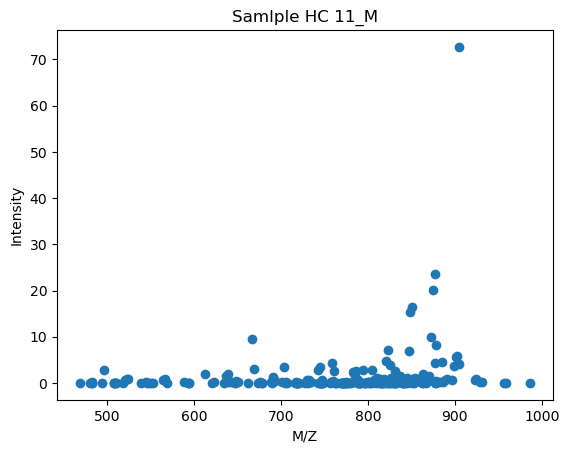

HC 11_M    72.712318
dtype: object

In [150]:
import matplotlib.pyplot as plt

plt.scatter(df_x_lipidoma.iloc[0:1], df_x_lipidoma.iloc[97:98])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
df_x_lipidoma[97:98].max(axis=1)


### TIC Normalization with Sum

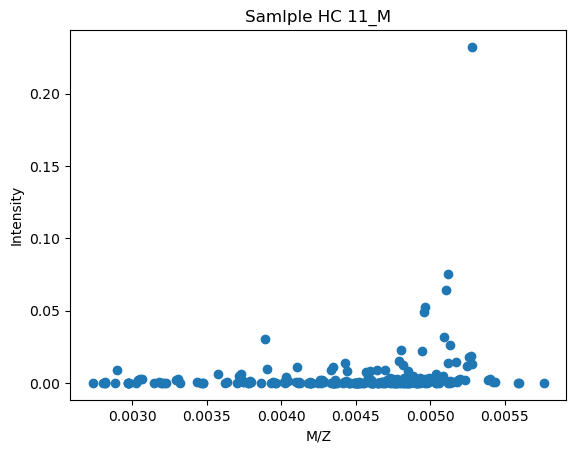

HC 11_M    0.232277
dtype: object

In [164]:
# df_x_lipidoma.isna().sum().sort_values(ascending=False)

# provo con la somma
tic = df_x_lipidoma.sum(axis=1)
df_x_lipidoma_tic = df_x_lipidoma.div(tic,axis=0)

plt.scatter(df_x_lipidoma_tic.iloc[0:1], df_x_lipidoma_tic.iloc[97:98])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
df_x_lipidoma_tic[97:98].max(axis=1)


### MAD

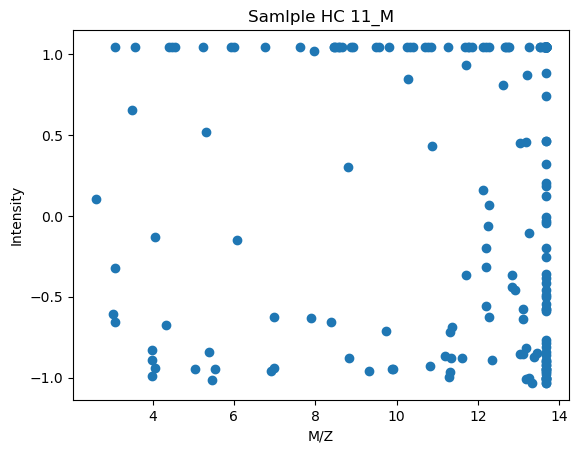

HC 11_M    1.042864
dtype: object

In [182]:
# provo con la mediana
tic_median = df_x_lipidoma.median(axis=1)
# print(tic_median)
df_x_lipidoma_mad_median_temp = (df_x_lipidoma.sub(tic_median,axis=0)).abs()
# print(df_x_lipidoma_tic_median_temp)
df_x_lipidoma_mad_median_temp_median = df_x_lipidoma_mad_median_temp.median(axis=1)
# print(df_x_lipidoma_tic_median_temp_mad)
df_x_lipidoma_MAD = (df_x_lipidoma.sub(df_x_lipidoma_mad_median_temp,axis=0)).div(df_x_lipidoma_mad_median_temp_median,axis=0)
df_x_lipidoma_MAD

plt.scatter(df_x_lipidoma_MAD.iloc[0:1], df_x_lipidoma_MAD.iloc[97:98])
plt.xlabel("M/Z")
plt.ylabel("Intensity")
plt.title("Samlple HC 11_M")
plt.show()
# axis=1 sono le righe; axis=0 sono le colonne
df_x_lipidoma_MAD[97:98].max(axis=1)